# Desription of Dataset

<div class="alert-warning">
    <b>CRIM</b>   - per capita crime rate by town  <br>
    <b>ZN</b>        - proportion of residential land zoned for lots over 25,000 sq.ft. <br>
    <b>INDUS</b>    - proportion of non-retail business acres per town. <br>
    <b>CHAS</b>      - Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
<b>NOX</b>       - nitric oxides concentration (parts per 10 million)    <br>
<b>RM</b>        - average number of rooms per dwelling       <br>
<b>AGE</b>       - proportion of owner-occupied units built prior to 1940          <br>
<b>DIS</b>       - weighted distances to five Boston employment centres   <br>
<b>RAD</b>       - index of accessibility to radial highways  <br>
<b>TAX</b>       - full-value property-tax rate per \$10,000     <br>
<b>PTRATIO</b>   - pupil-teacher ratio by town     <br>
<b>B</b>         - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  <br>
<b>LSTAT</b>     - \% lower status of the population   <br>
<b>MEDV</b>     - Median value of owner-occupied homes in $1000's <br>
    </div>

# Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import random
warnings.filterwarnings('ignore')
%matplotlib inline

# Import Dataset

In [2]:
boston_df = pd.read_csv ("../input/the-boston-houseprice-data/boston.csv")
boston_df.rename(columns={'MEDV':'Price'}, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# here define variable use for split data, base on no. of rows 
boston_df_shape=boston_df.shape
boston_df_rows = boston_df_shape[0]

# Data Preprocessing

<div class="alert-warning"><div class="alert-danger"><h1> Statistical Description of Dataset</h1> </div>
- This "describe" function use for only numerical columns <br>
- It's define the Number of non-zero rows in columns, Mean, Standasrd Deviation, Minimum value of the column, 25% percentile, 50% percentile, 75% percentile, Maximum vlaue of the column </div>

In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<div class="alert-warning">- Here no any missing value so we check outliers in every features</div>

# Data Analysis

<div class="alert-warning">- Remove Outliers from Dataset using boxplot method</div>

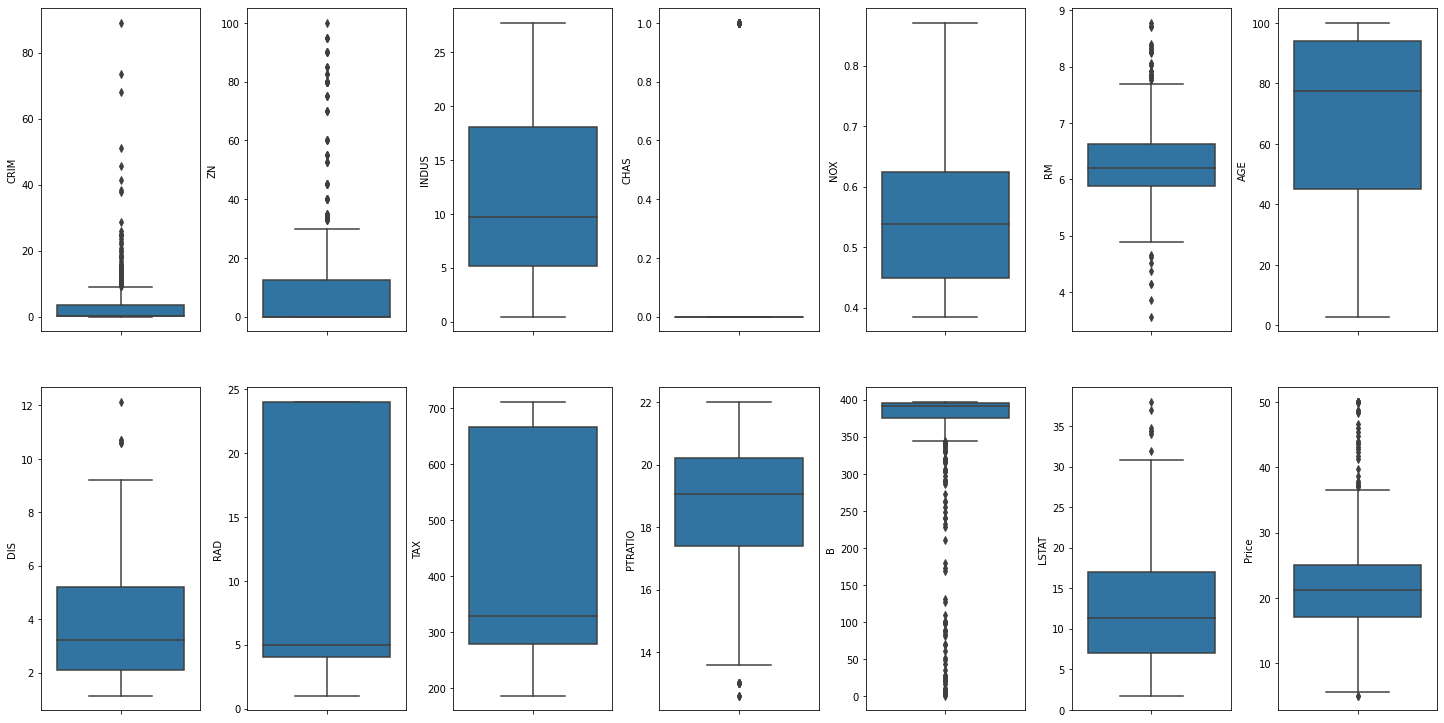

In [5]:
# find outliers using boxplot
boston_df_rows = 2
boston_df_cols = 7

fig, ax = plt.subplots(nrows = boston_df_rows, ncols=boston_df_cols, figsize = (20,10) )
index=0
ax= ax.flatten()
for col,value in boston_df.items():
    sns.boxplot(data = boston_df, y= col, ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.5,w_pad =0.7 , h_pad =5)

In [6]:
for key , value in boston_df.items():
    qua1 = value.quantile(0.25)
    qua3 = value.quantile(0.75)
    iqr = qua3 - qua1
    value_col = value[(value <= qua1 - 1.5 * iqr) | (value >= qua3 + 1.5 * iqr)]
    percentage = np.shape(value_col)[0] * 100.0 / np.shape(boston_df)[0]
    print("Column %s outliers = %.2f%%" % (key, percentage))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column Price outliers = 7.91%


<div class="alert-warning" > <h4>- Data Relation between two featuers using Pariplot </h4></div

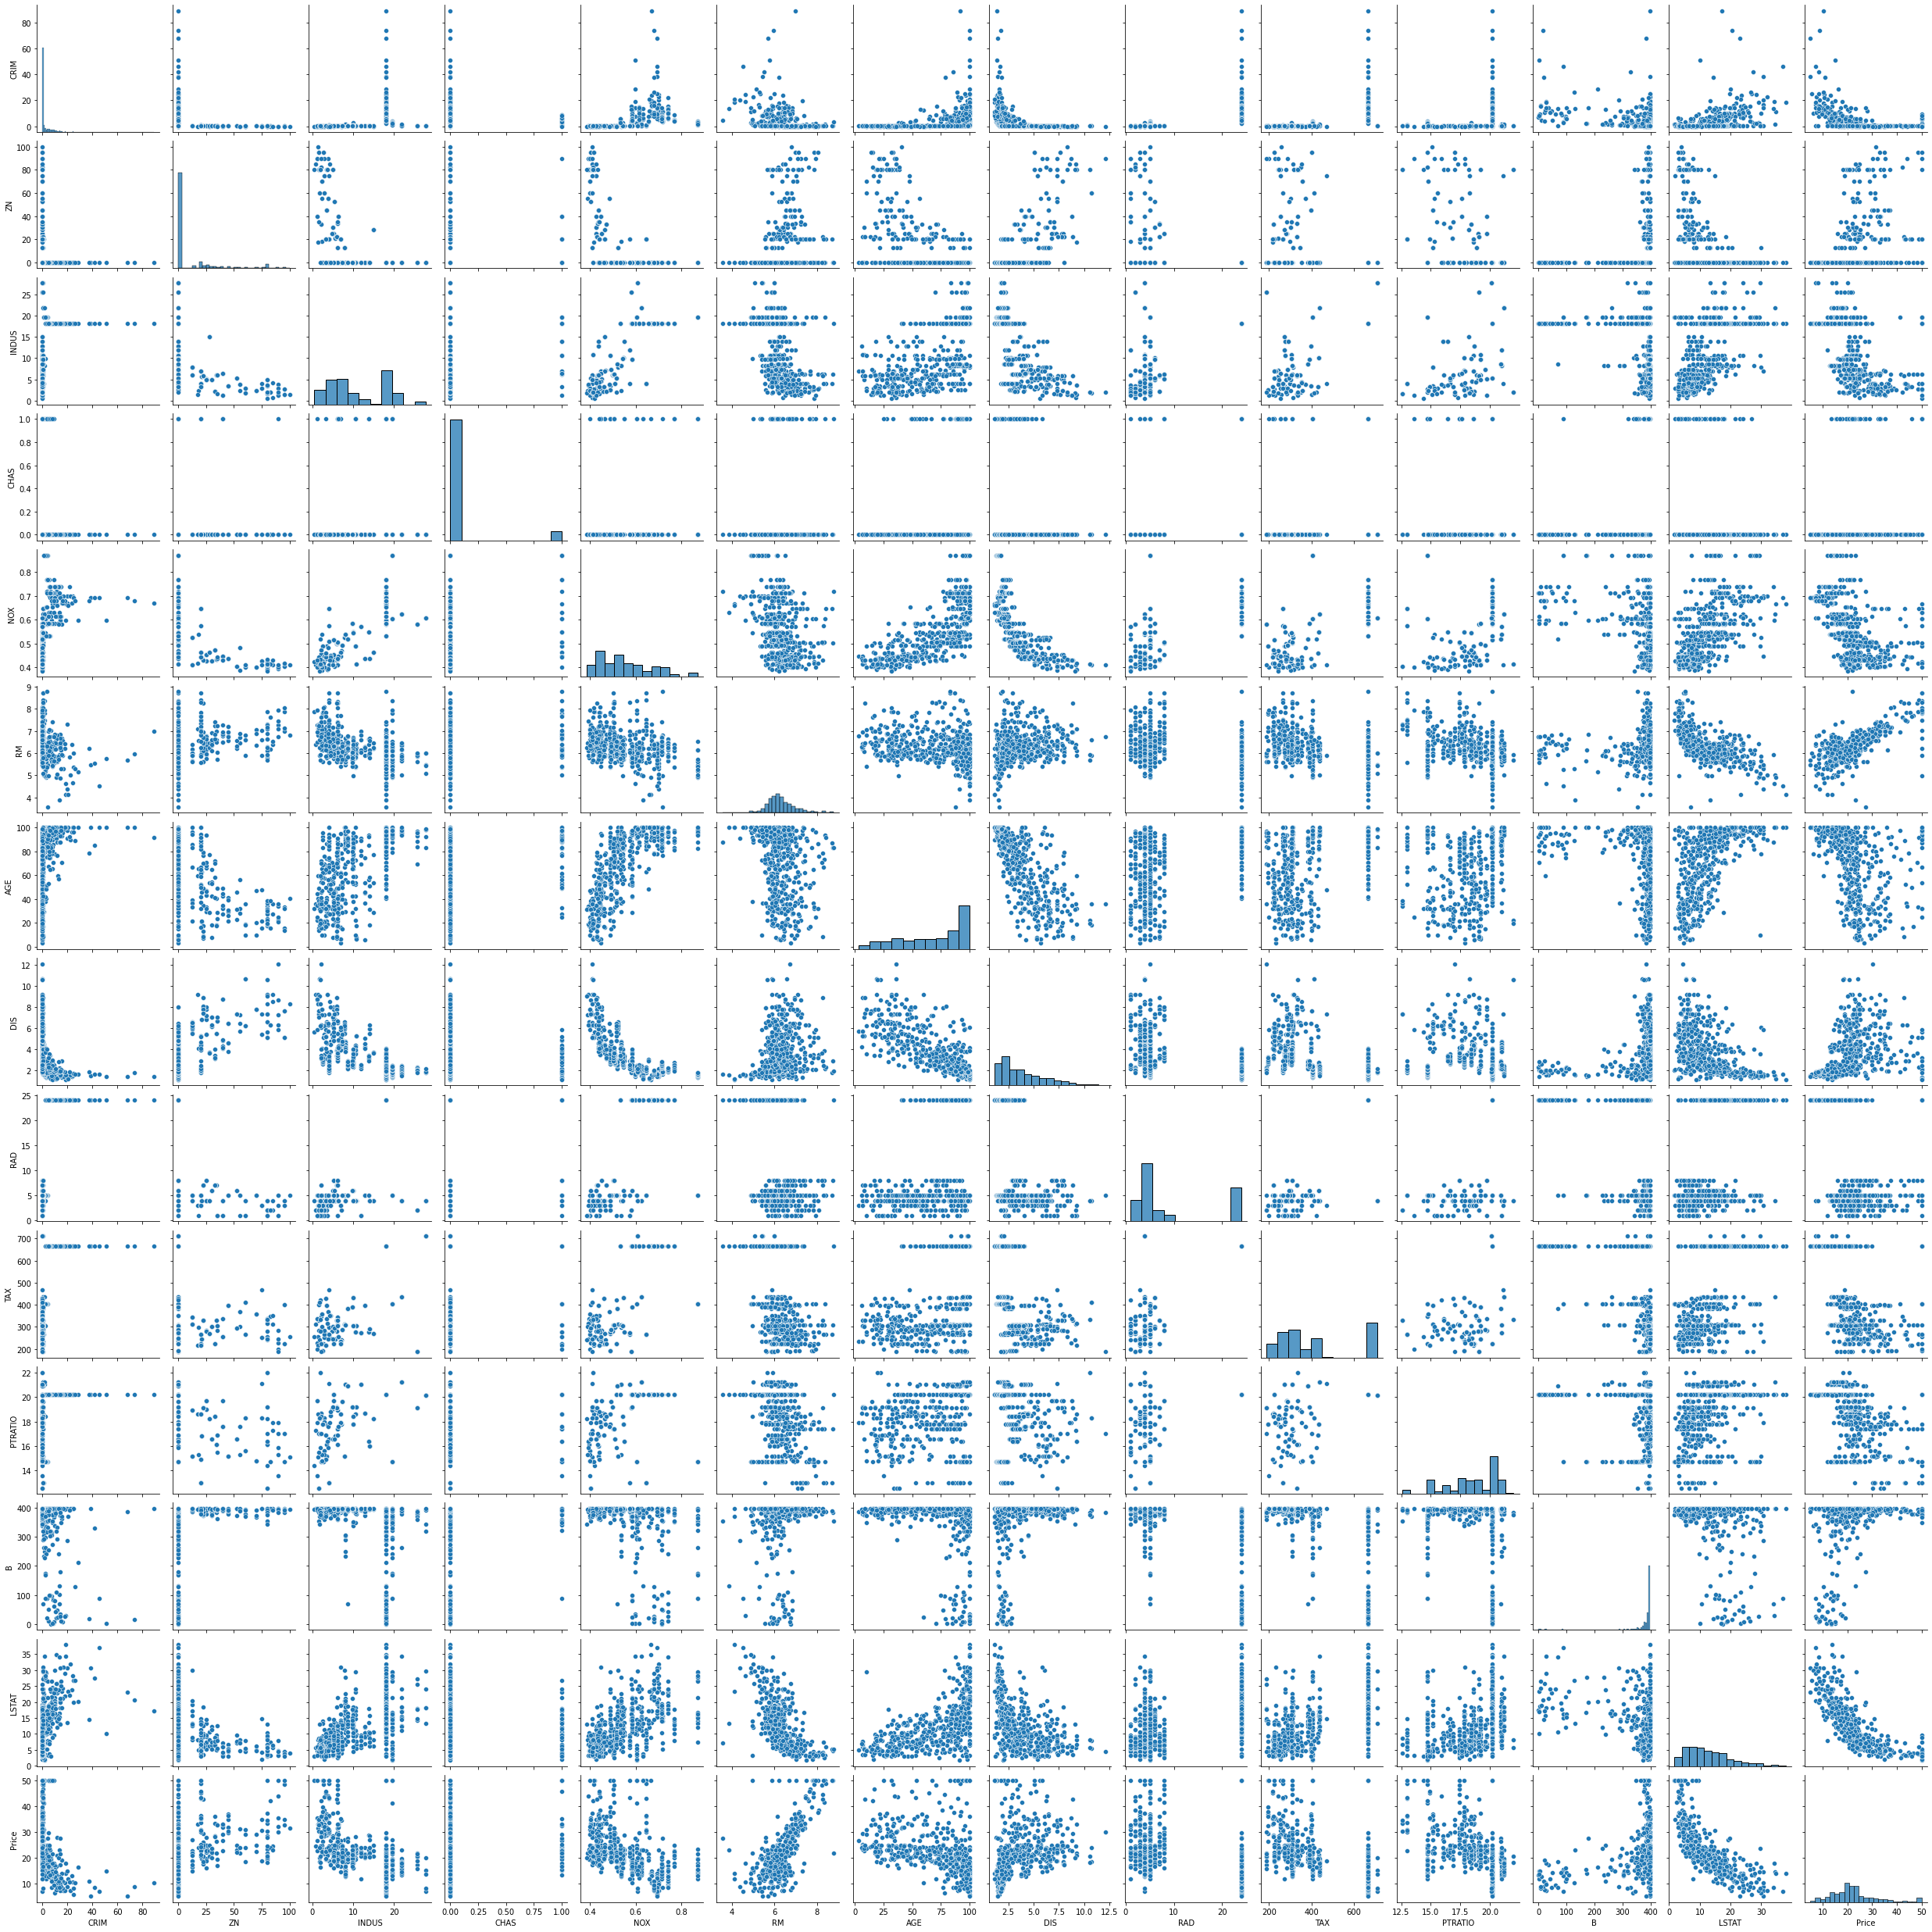

In [7]:
sns.pairplot(boston_df)

<div class="alert-warning">- PDF of every feature so we can show the distribution of data</div>

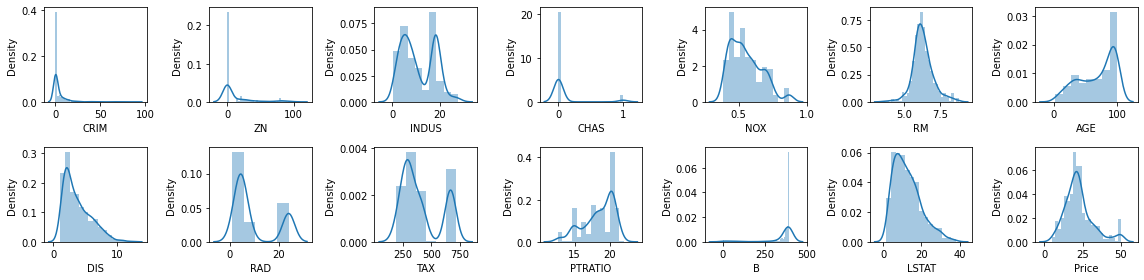

In [8]:
boston_df_rows_ana = 2
boston_df_cols_ana = 7

fig, ax = plt.subplots(nrows = boston_df_rows_ana, ncols=boston_df_cols_ana, figsize = (16,4) )
col=boston_df.columns
index = 0

for i in range(boston_df_rows_ana):
    for j in range(boston_df_cols_ana):
        sns.distplot(boston_df[col[index]],ax = ax[i][j])
        index = index +1

plt.tight_layout()

<div class="alert-warning">
- From the dataset, feature wise distribution we cann't use CRIM, ZN, CHAS, B features because it is skew distributed.<br>
- Whereas DIS, PTRATIO, NOX, RM, LSTAT features are normally distributed or slightly noramally distributed.So we can use as a "Price" prediction. But DIS isn't matter that much so remove that feature.<br>
- Here in  price dataset at point '50' data are outliers, otherwise data spread approximately normally. So, we remove that outliers 
    </div>

In [9]:
boston_df_outliers = boston_df[boston_df['Price']>=50]
boston_df = boston_df.drop(boston_df_outliers.index, axis=0)
boston_df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
263,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264.0,13.0,393.42,11.25,31.0
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284.0,19.7,395.11,13.15,18.7
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2


<div class="alert-warning"> After removing outliers subplot of data</div>

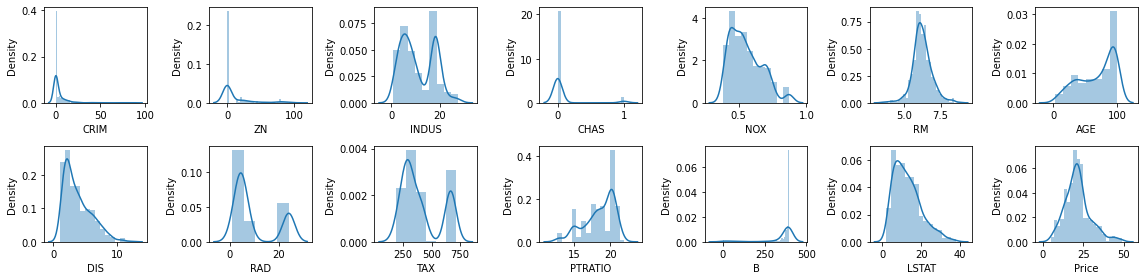

In [10]:
boston_df_rows_ana = 2
boston_df_cols_ana = 7

fig, ax = plt.subplots(nrows = boston_df_rows_ana, ncols=boston_df_cols_ana, figsize = (16,4) )
col=boston_df.columns
index = 0

for i in range(boston_df_rows_ana):
    for j in range(boston_df_cols_ana):
        sns.distplot(boston_df[col[index]],ax = ax[i][j])
        index = index +1

plt.tight_layout()

### Correlation between two columns

In [11]:
boston_df_corr = boston_df.corr()

#### Describe correlation between two interger features 

<AxesSubplot:>

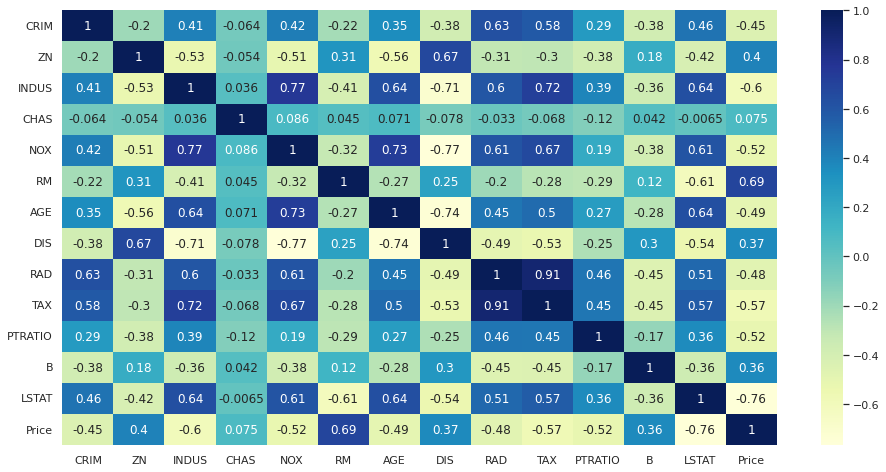

In [12]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(boston_df_corr, annot =True,cmap="YlGnBu", annot_kws = {'size':12})

<div class="alert-warning">
- So from above correlation matrix to we identify that, MEDV feature more coreelatd with INDUS, NOX, TAX, PTRATIO, LSTAT, RM features<br>
- Now we apply different threshold value of correlation coefficient and check which features gives us best prediction of price <br>
    </div>

In [13]:
def getCorrelatedFeatures(corrdata, threshold):
    boston_df_features = []
    boston_df_value = []
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            boston_df_features.append(index)
            boston_df_value.append(corrdata[index])
            
    df = pd.DataFrame(data = boston_df_value, index = boston_df_features,columns = ['CorrValue'] )
    return df

In [14]:
threshold = 0.5
corr_value = getCorrelatedFeatures(boston_df_corr['Price'],threshold)
print(corr_value)

         CorrValue
INDUS    -0.600005
NOX      -0.524451
RM        0.686634
TAX      -0.572442
PTRATIO  -0.518641
LSTAT    -0.759837
Price     1.000000


# Data Featuring

<div class="alert-warning"> - Now we choose different features and check which one is better for price prediction</div>

## Feature Selection for Univariate

<div class="alert-warning">- From Correlation matrix and normally distribution plot, base on that choose 'RM' as feature for price prediction</div>

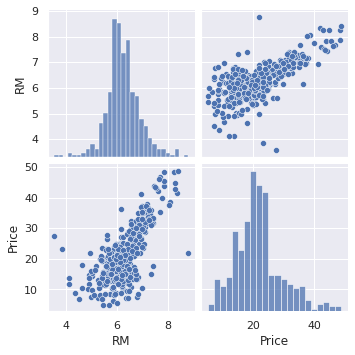

In [15]:
boston_df_univariate= boston_df[['RM' ,'Price']]
sns.pairplot(boston_df_univariate)

## Feature Selection for Multivariate

<div class="alert-success"><h2>Method: 1.  Base on distplot we choose features and predict the model and identify this features are more relavent or not?</h2></div> 

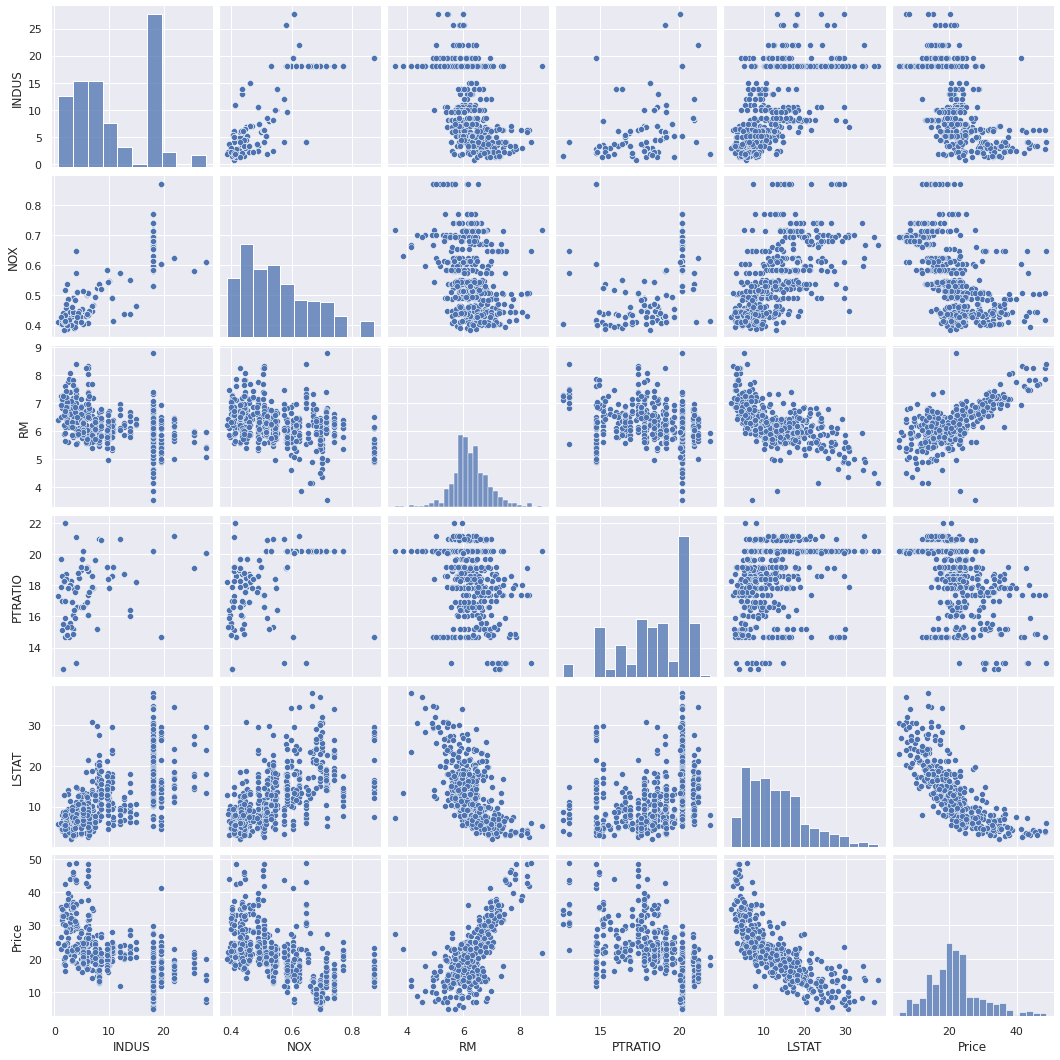

In [16]:
boston_df_displot = boston_df[['INDUS','NOX', 'RM' ,'PTRATIO','LSTAT','Price']]
sns.pairplot(boston_df_displot)

<div class="alert-success"><h2>Method: 2. Using all features to check the Accuracy</h2></div>

In [17]:
boston_df_all = boston_df

# Data Train Test Split

In [18]:
def train_test_split(train_test_data):
    # Now split data into 80:20 for train and test purpose
    boston_df_train = train_test_data.sample(frac=0.8, random_state=0)    # meaning od random_state
    boston_df_test = train_test_data.drop(boston_df_train.index) 

    # Train and test data convert into X_train, X_test, y_train, y_test
    X_train = boston_df_train.iloc[:,:-1]
    X_test = boston_df_test.iloc[:,:-1]
    y_train = boston_df_train.iloc[:,-1:]
    y_test = boston_df_test.iloc[:,-1:]
    return X_train,X_test,y_train,y_test

# Linear Regression Model

<div class="alert-success"><h1>Closed Form Method</h1></div>

In [19]:
class ClosedFormLinearRegression:
    
    def __init__(self):
        self.coefficient = None
        self.intercept = None
        
    def cf_linear_regression_fit(self,X_train,y_train):
        X_train = X_train.values
        X_train= np.insert(X_train,0,1,axis=1)
        weights = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept = weights[0]
        self.coefficient = weights[1:]
        
    def cf_linear_regression_predict(self,X_test):
        y_pred = np.dot(X_test,self.coefficient) + self.intercept
        return y_pred

<div class="alert-success"><h1>Gradient Descent Method</h1></div>

In [20]:
class GradientDecentLinearRegression:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        
    def gd_linear_regression_fit(self,X_train,y_train,dimention):
        # init your coefs
        self.intercept = 0
        self.coefefficient = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            if dimention==1:
                self.coefefficient = self.coefefficient.reshape(1,1)
            elif (dimention==2):
                self.coefefficient = self.coefefficient.reshape(5,1)
            else:
                self.coefefficient = self.coefefficient.reshape(13,1)
                
            y_hat = np.dot(np.array(X_train),self.coefefficient) + self.intercept
                
            intercept_der = -2 * np.mean(np.array(y_train) - y_hat)
           
            self.intercept_ = self.intercept - (self.lr * intercept_der)

            coefefficient_der = (-2) * np.dot((np.array(y_train) - y_hat).T,np.array(X_train)).T/X_train.shape[0]
            self.coefefficient = self.coefefficient - (self.lr * coefefficient_der)
        
    
    def gd_linear_regression_predict(self,X_test):
        return np.dot(X_test,self.coefefficient) + self.intercept

# Multivariate Linear Regrerssion

<div class="alert-danger">
<h1>Closed Form </h1>
</div>

In [21]:
linear_reg_closed = ClosedFormLinearRegression()
linear_reg_gd = GradientDecentLinearRegression(epochs=1000,learning_rate=0.000895) 

<div class="alert-success"><h3>Selected features use for data training</h3></div>

In [22]:
X_train,X_test, y_train, y_test = train_test_split(boston_df_displot)

In [23]:
Coeff = linear_reg_closed.cf_linear_regression_fit(X_train,y_train)
house_price = linear_reg_closed.cf_linear_regression_predict(X_test)
MSE = np.square(np.subtract(y_test,house_price)).mean()

In [24]:
MSE

Price    20.057118
dtype: float64

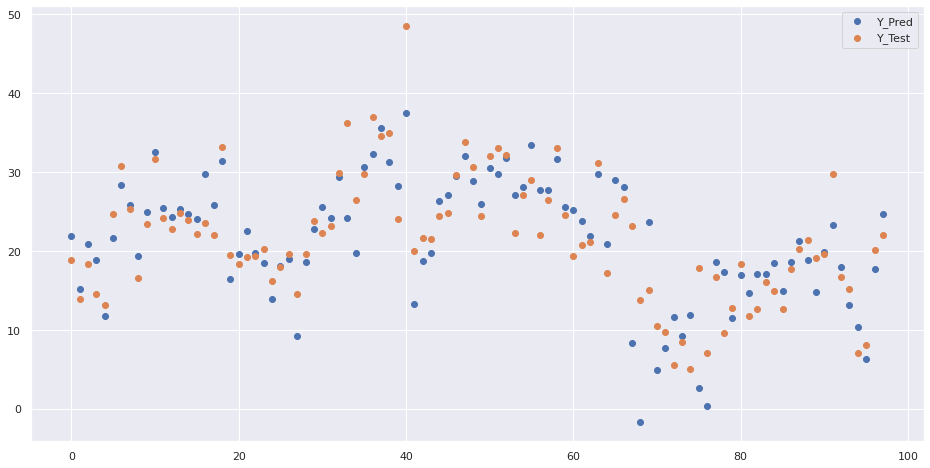

In [25]:
output_df = np.array(house_price)
output_df = output_df.reshape(output_df.shape[0],1)
prd_test_df = pd.DataFrame(output_df, columns = ['y_pred'])
y_test = np.array(y_test)
y_test_df = y_test.reshape(y_test.shape[0],1)
prd_test_df['y_test'] = y_test_df

plt.scatter(prd_test_df.index, output_df )
plt.scatter(prd_test_df.index, y_test_df)
plt.legend(["Y_Pred" , "Y_Test"])

<div class="alert-success"><h3>All features use for model trainnig</h3></div>

In [26]:
X1_train,X1_test,y1_train,y1_test = train_test_split(boston_df_all)

In [27]:
Coeff = linear_reg_closed.cf_linear_regression_fit(X1_train,y1_train)
house_price = linear_reg_closed.cf_linear_regression_predict(X1_test)
MSE = np.square(np.subtract(y1_test,house_price)).mean()

In [28]:
MSE

Price    19.073603
dtype: float64

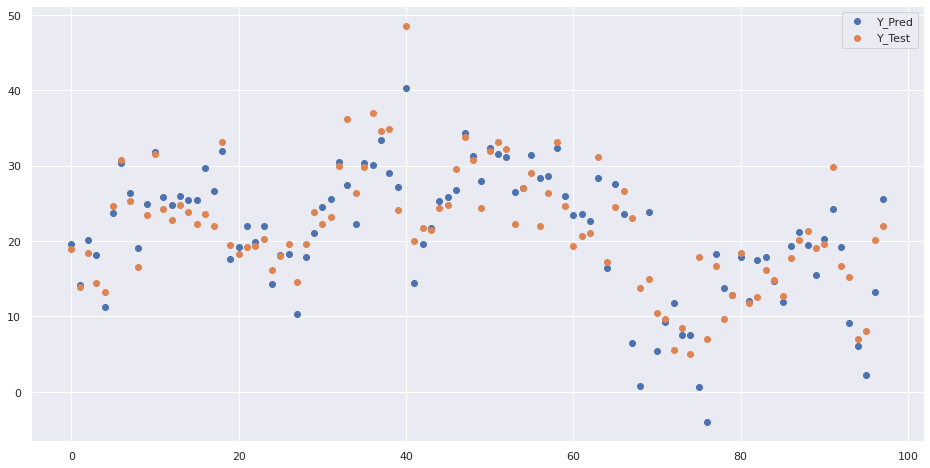

In [29]:
output_df = np.array(house_price)
output_df = output_df.reshape(output_df.shape[0],1)
prd_test_df = pd.DataFrame(output_df, columns = ['y_pred'])

y_test = np.array(y_test)
y_test_df = y_test.reshape(y_test.shape[0],1)
prd_test_df['y_test'] = y_test_df

plt.scatter(prd_test_df.index, output_df )
plt.scatter(prd_test_df.index, y_test_df)
plt.legend(["Y_Pred" , "Y_Test"])

<div class="alert-danger"><h1> Gradient Descent</h1></div>

<div class="alert-success"><h3>Selected features use for data training</h3></div>

In [30]:
linear_reg_gd = GradientDecentLinearRegression(epochs=1500,learning_rate=0.000895)    

In [31]:
linear_reg_gd.gd_linear_regression_fit(X_train,y_train,dimention=2)
house_price_gd = linear_reg_gd.gd_linear_regression_predict(X_test)
MSE = np.square(np.subtract(y_test,house_price_gd)).mean()
print(MSE)

23.747210797308117


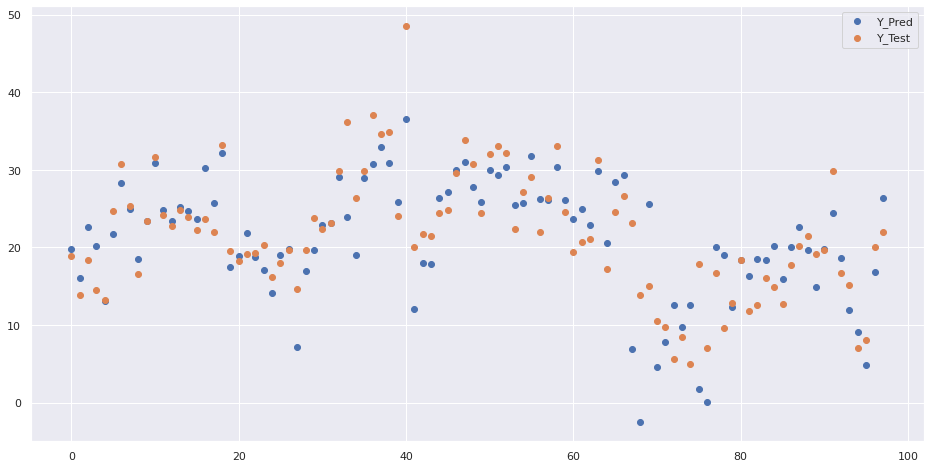

In [32]:
output_df = np.array(house_price_gd)
output_df = output_df.reshape(output_df.shape[0],1)
prd_test_df = pd.DataFrame(output_df, columns = ['y_pred'])

y_test = np.array(y_test)
y_test_df = y_test.reshape(y_test.shape[0],1)
prd_test_df['y_test'] = y_test_df

plt.scatter(prd_test_df.index, output_df )
plt.scatter(prd_test_df.index, y_test_df)
plt.legend(["Y_Pred" , "Y_Test"])

<div class="alert-success"><h3>All features use for model trainnig</h3></div>

In [33]:
linear_reg_gd1 = GradientDecentLinearRegression(epochs=60000,learning_rate=0.00000324)   
linear_reg_gd1.gd_linear_regression_fit(X1_train,y1_train,dimention=3)
house_price_gd = linear_reg_gd1.gd_linear_regression_predict(X1_test)
MSE = np.square(np.subtract(y1_test,house_price_gd)).mean()
print(MSE)

Price    28.166084
dtype: float64


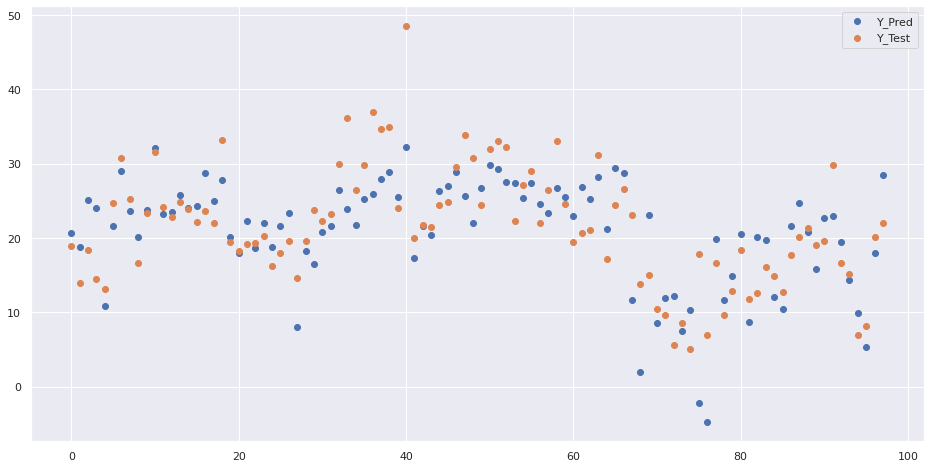

In [34]:
output_df = np.array(house_price_gd)
output_df = output_df.reshape(output_df.shape[0],1)
prd_test_df = pd.DataFrame(output_df, columns = ['y_pred'])

y_test = np.array(y_test)
y_test_df = y_test.reshape(y_test.shape[0],1)
prd_test_df['y_test'] = y_test_df

plt.scatter(prd_test_df.index, output_df )
plt.scatter(prd_test_df.index, y_test_df)
plt.legend(["Y_Pred" , "Y_Test"])

# <div class="alert-danger"><h1>Output:</h1></div>

|             |**Selected Features for model trainnig**| **Closed Form Method (MSE)**   | **Gradient Descent Method (MSE)**|
| :---------: |      :---------:                   |:---------------------: | :---------------------: |
| **Multivariate**| Selected Features                  |20.057| 23.016|
|             | All features                       |19.073|28.1317|
